<a href="https://colab.research.google.com/github/HarpyTech/DSAI-MTech/blob/main/Sem_3/Capstone/diabetics_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PMC

## Load Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankitbatra1210/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.35M/2.35M [00:00<00:00, 124MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankitbatra1210/diabetes-dataset/versions/1


In [ ]:
import os

os.listdir(path)

['diabetes_dataset00.csv']

In [ ]:
import pandas as pd

file_path = os.path.join(path, os.listdir(path)[0])

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred while reading the dataset: {e}")

df.shape

Dataset loaded successfully!
                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              

(70000, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [ ]:
# Install necessary libraries
# !pip install transformers datasets faiss-cpu sentence-transformers wordcloud matplotlib seaborn umap-learn tqdm scikit-learn

In [ ]:

# import torch
# import pandas as pd
# import faiss
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import umap
# from tqdm import tqdm
# from datasets import load_dataset
# from transformers import RagRetriever
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# from wordcloud import WordCloud
# from IPython.display import display, Markdown

In [ ]:
df.Target.value_counts(normalize=True)

,proportion
Target,
MODY,0.079329
Secondary Diabetes,0.078271
Cystic Fibrosis-Related Diabetes (CFRD),0.078057
Type 1 Diabetes,0.077800
Neonatal Diabetes Mellitus (NDM),0.077257
Wolcott-Rallison Syndrome,0.077143
Type 2 Diabetes,0.077100
Prediabetic,0.076800
Gestational Diabetes,0.076343


<Axes: xlabel='Target'>

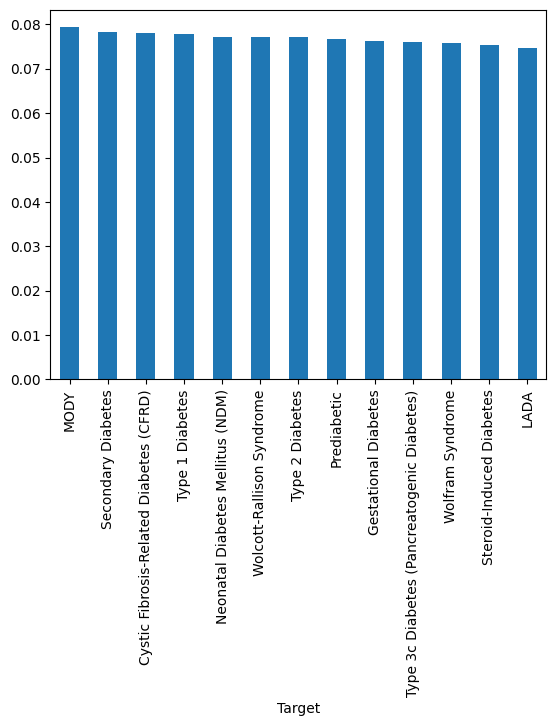

In [ ]:
df.Target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [ ]:
df.isnull().sum()

,0
Target,0
Genetic Markers,0
Autoantibodies,0
Family History,0
Environmental Factors,0
Insulin Levels,0
Age,0
BMI,0
Physical Activity,0
Dietary Habits,0


In [ ]:
df.shape

(70000, 34)

In [ ]:
Target = df.Target
data = df.drop('Target', axis=1)

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Preprocessing the DataFrame

# Handle missing values
# For numerical columns, you might impute with mean or median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, you might impute with the mode
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'Target']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for missing values after imputation
print("\nMissing values after imputation:")
# print(df.isnull().sum())

# You might want to perform feature scaling for numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
data_label = df.copy()

# You might want to perform one-hot encoding for categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
label = LabelEncoder()
for col in categorical_cols:
    data_label[col] = label.fit_transform(df[col])

# Display the first few rows of the preprocessed DataFrame
print("\nDataFrame after preprocessing:")
# print(df.head())

# Display the shape of the preprocessed DataFrame
print("\nShape of DataFrame after preprocessing:")
df.shape, data_label.shape, df_dummies.shape

/tmp/ipython-input-4-127854811.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-4-127854811.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Missing values after imputation:

DataFrame after preprocessing:

Shape of DataFrame after preprocessing:


((70000, 34), (70000, 34), (70000, 39))

In [ ]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  object 
 1   Genetic Markers                70000 non-null  int64  
 2   Autoantibodies                 70000 non-null  int64  
 3   Family History                 70000 non-null  int64  
 4   Environmental Factors          70000 non-null  int64  
 5   Insulin Levels                 70000 non-null  float64
 6   Age                            70000 non-null  float64
 7   BMI                            70000 non-null  float64
 8   Physical Activity              70000 non-null  int64  
 9   Dietary Habits                 70000 non-null  int64  
 10  Blood Pressure                 70000 non-null  float64
 11  Cholesterol Levels             70000 non-null  float64
 12  Waist Circumference            70000 non-null 

In [ ]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Previous Gestational Diabetes_Yes,Pregnancy History_Normal,Cystic Fibrosis Diagnosis_Yes,Steroid Use History_Yes,Genetic Testing_Positive,Liver Function Tests_Normal,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_Yes
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.685001e-17,9.917146e-17,1.092206e-16,-1.207923e-16,7.044524e-17,-3.619708e-16,2.743710e-16,-1.009986e-17,-4.714959e-17,-3.246165e-16,...,0.500500,0.503857,0.498071,0.497971,0.504500,0.500271,0.248886,0.250400,0.251829,0.499157
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,0.500003,0.499989,0.500000,0.499999,0.499983,0.500003,0.432371,0.433246,0.434066,0.500003
min,-1.539754e+00,-1.521678e+00,-2.125463e+00,-2.574074e+00,-2.130308e+00,-2.212369e+00,-1.675518e+00,-1.608675e+00,-1.879665e+00,-3.365060e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.980366e-01,-8.563741e-01,-7.952759e-01,-6.186829e-01,-7.155999e-01,-7.425182e-01,-8.242809e-01,-8.820087e-01,-7.788142e-01,-6.071341e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.417483e-01,-4.850539e-02,3.609082e-02,8.325239e-02,-8.684063e-02,-1.545779e-01,-1.806627e-01,5.227699e-02,-7.827265e-02,1.450275e-01,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.926841e-01,8.068850e-01,7.011842e-01,6.849112e-01,6.766527e-01,5.803474e-01,6.913361e-01,6.751341e-01,8.224236e-01,7.300420e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2.539693e+00,2.232536e+00,2.363918e+00,1.888229e+00,2.338374e+00,2.785123e+00,2.871333e+00,2.439896e+00,2.573777e+00,1.565777e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  object 
 1   Genetic Markers                70000 non-null  int64  
 2   Autoantibodies                 70000 non-null  int64  
 3   Family History                 70000 non-null  int64  
 4   Environmental Factors          70000 non-null  int64  
 5   Insulin Levels                 70000 non-null  float64
 6   Age                            70000 non-null  float64
 7   BMI                            70000 non-null  float64
 8   Physical Activity              70000 non-null  int64  
 9   Dietary Habits                 70000 non-null  int64  
 10  Blood Pressure                 70000 non-null  float64
 11  Cholesterol Levels             70000 non-null  float64
 12  Waist Circumference            70000 non-null 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                70000 non-null  object
 1   Autoantibodies                 70000 non-null  object
 2   Family History                 70000 non-null  object
 3   Environmental Factors          70000 non-null  object
 4   Insulin Levels                 70000 non-null  int64 
 5   Age                            70000 non-null  int64 
 6   BMI                            70000 non-null  int64 
 7   Physical Activity              70000 non-null  object
 8   Dietary Habits                 70000 non-null  object
 9   Blood Pressure                 70000 non-null  int64 
 10  Cholesterol Levels             70000 non-null  int64 
 11  Waist Circumference            70000 non-null  int64 
 12  Blood Glucose Levels           70000 non-null  int64 
 13  E

In [ ]:
data["Early Onset Symptoms"].value_counts()

,count
Early Onset Symptoms,
No,35059
Yes,34941


In [ ]:
data.describe(include=object)

,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
unique,2,2,2,2,3,2,2,3,2,3,2,2,2,2,2,2,2,2,4,2
top,Positive,Negative,Yes,Absent,Moderate,Healthy,Low Risk,Medium,Smoker,Low,Abnormal,No,Yes,Normal,No,No,Positive,Normal,Protein Present,No
freq,35101,35058,35168,35088,23427,35020,35018,23413,35045,23411,35278,35101,35035,35270,35135,35142,35315,35019,17628,35059


In [ ]:
data_label["Physical Activity"].unique()

array([0, 1, 2])

<Axes: >

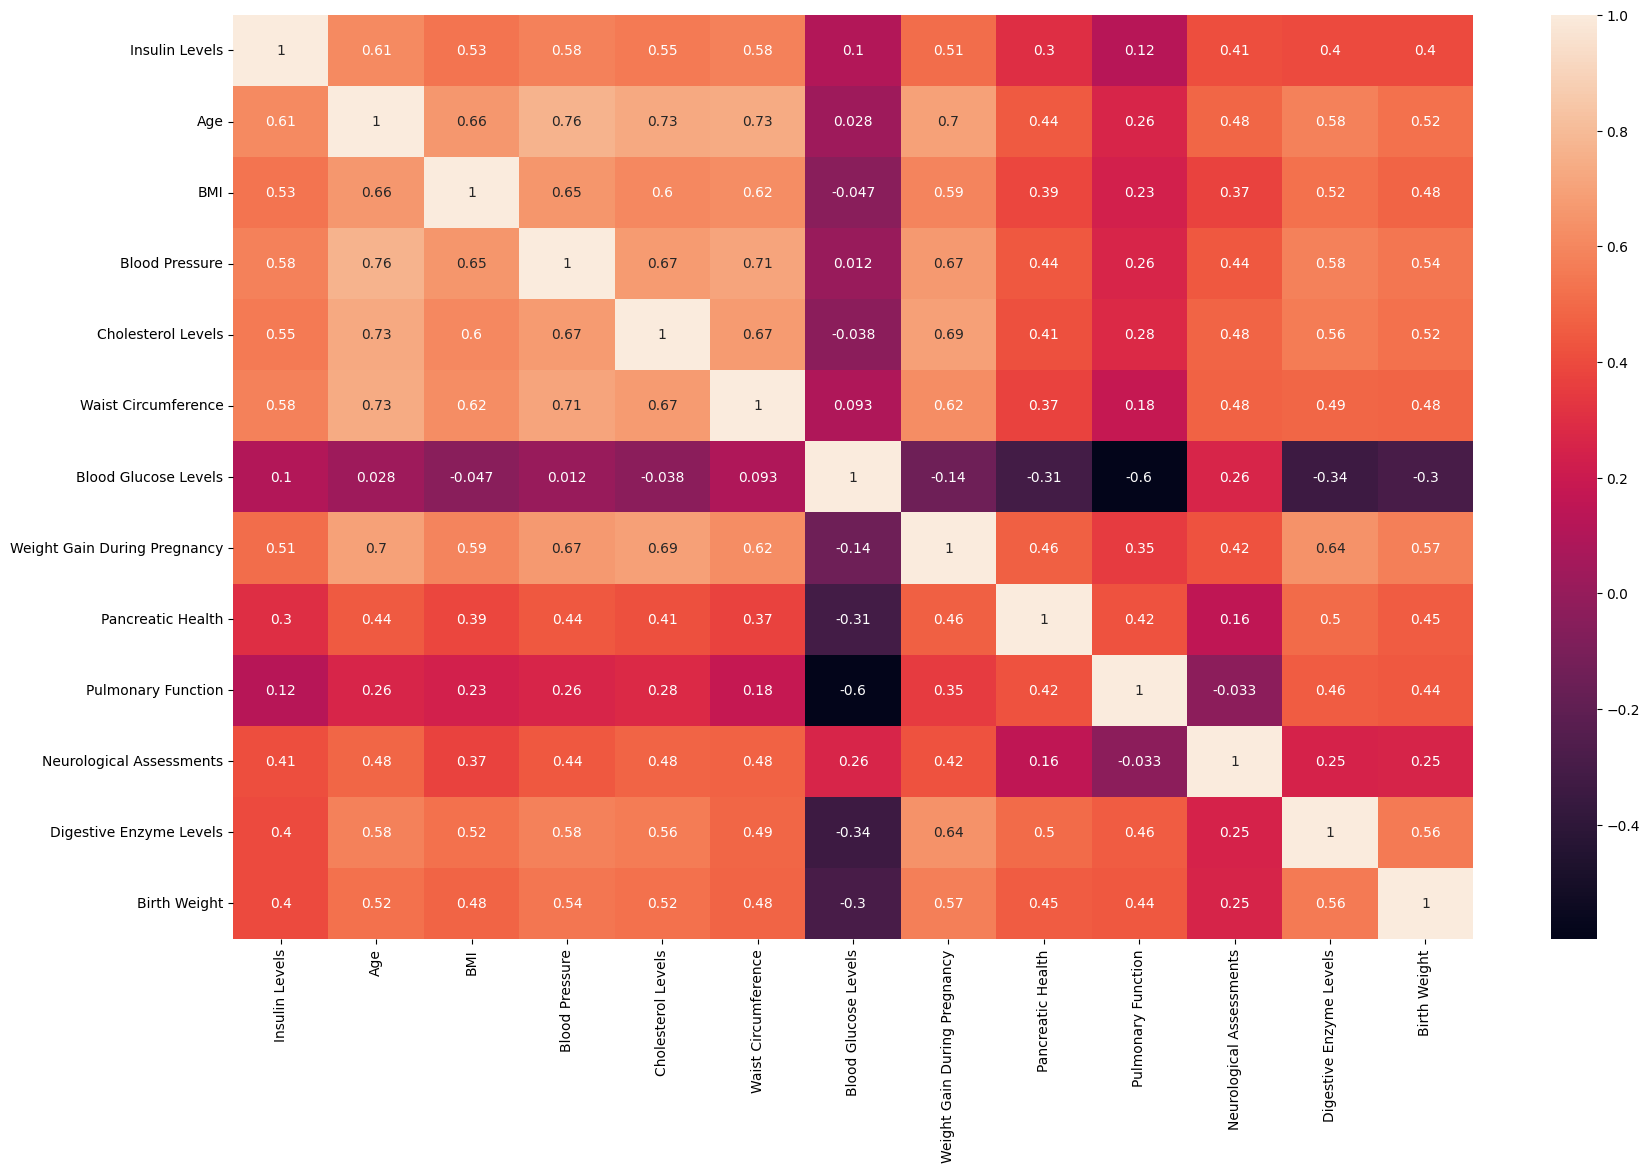

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))


sns.heatmap(data_label[numerical_cols].corr("pearson"), annot=True)

## Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Base Model: Logistic Regression
Accuracy: 0.7536

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1093
           1       0.70      0.69      0.70      1069
           2       0.80      0.82      0.81      1044
           3       0.76      0.76      0.76      1111
           4       0.99      0.99      0.99      1082
           5       0.77      0.79      0.78      1075
           6       0.61      0.58      0.59      1096
           7       0.56      0.52      0.54      1055
           8       0.82      0.86      0.84      1089
           9       0.70      0.74      0.72      1079
          10       0.56      0.59      0.57      1064
          11       0.85      0.84      0.84      1080
          12       0.84      0.86      0.85      1063

    accuracy                           0.75     14000
   macro avg       0.75      0.75      0.75     14000
weighted avg       0.75      0.75      0.75     14000


Confu

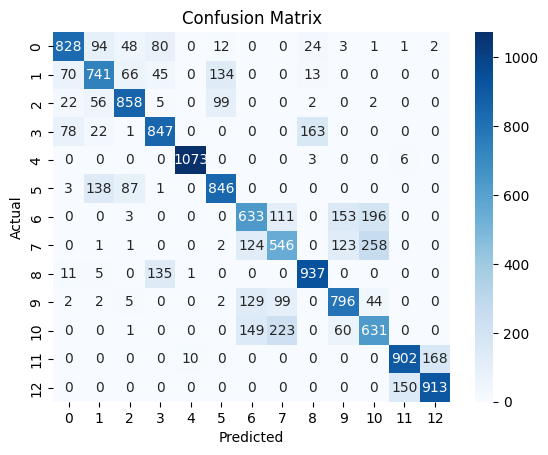

In [ ]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_dummies is the preprocessed DataFrame with one-hot encoded categorical features
# and df is the original DataFrame with the 'Target' column

# Define features (X) and target (y)
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a base model (Logistic Regression in this case)
# Logistic Regression is a good starting point for binary classification
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = base_model.predict(X_test)

# Evaluate the base model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Base Model: Logistic Regression")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# To interpret the types of diabetes, you would typically need more granular target labels
# in your dataset (e.g., Type 1, Type 2, Gestational).
# The current dataset only has a binary 'Target' (likely indicating presence or absence of diabetes).
# If the dataset had more specific labels, you would use a multi-class classification model.
# For example, using a simple Logistic Regression for multi-class:
# from sklearn.linear_model import LogisticRegression
# multi_class_model = LogisticRegression(multi_class='ovr', random_state=42) # 'ovr' or 'multinomial'

# For now, we'll stick to the binary classification as per the dataset structure.

# You can visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Fine Tuning


Best Hyperparameters: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}

Tuned Model: Logistic Regression with Best Hyperparameters
Accuracy: 0.7560

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1093
           1       0.70      0.70      0.70      1069
           2       0.80      0.82      0.81      1044
           3       0.76      0.76      0.76      1111
           4       1.00      1.00      1.00      1082
           5       0.77      0.79      0.78      1075
           6       0.62      0.58      0.60      1096
           7       0.56      0.52      0.54      1055
           8       0.83      0.86      0.84      1089
           9       0.71      0.74      0.72      1079
          10       0.56      0.59      0.58      1064
          11       0.86      0.85      0.85      1080
          12       0.85      0.86      0.85      1063

    accuracy                           0.76     14000
   macro avg       

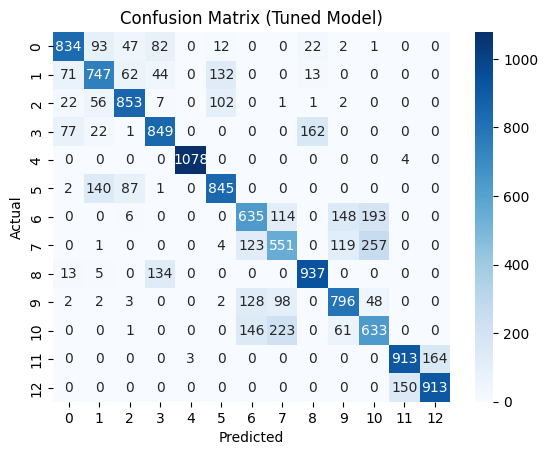

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
# C: Inverse of regularization strength; smaller values specify stronger regularization.
# solver: Algorithm to use in the optimization problem. 'liblinear' is good for small datasets.
# max_iter: Maximum number of iterations taken for the solvers to converge.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'], # 'lbfgs' is generally good, 'liblinear' for small datasets
    'max_iter': [100, 200, 500]
}

# Initialize GridSearchCV with the base model, parameter grid, and cross-validation folds
# cv=5 means 5-fold cross-validation
# scoring='accuracy' can be changed to other metrics like 'f1', 'precision', 'recall' depending on the goal
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters: {best_params}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"\nTuned Model: Logistic Regression with Best Hyperparameters")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("\nClassification Report:")
print(classification_rep_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_tuned)

# You can also compare the accuracy of the base model and the tuned model
print(f"\nBase Model Accuracy: {accuracy:.4f}")
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")

# Visualize the confusion matrix of the tuned model
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()


Original number of features: 38

Applying Univariate Feature Selection (SelectKBest with f_classif)...

Top 10 features based on f_classif scores:
                        Features         Score
1                            Age  30366.654724
3                 Blood Pressure  21027.546513
6           Blood Glucose Levels  18945.471052
7   Weight Gain During Pregnancy  16738.843660
4             Cholesterol Levels  14570.483559
5            Waist Circumference  14101.129129
11       Digestive Enzyme Levels  11165.533666
2                            BMI   9494.867234
9             Pulmonary Function   9264.533781
12                  Birth Weight   6769.518023

Shape of data after SelectKBest: (70000, 10)

Applying Feature Importance from RandomForestClassifier...

Feature importances from RandomForestClassifier:
Age                                  0.145352
Blood Glucose Levels                 0.135026
Weight Gain During Pregnancy         0.082048
Digestive Enzyme Levels              0.081

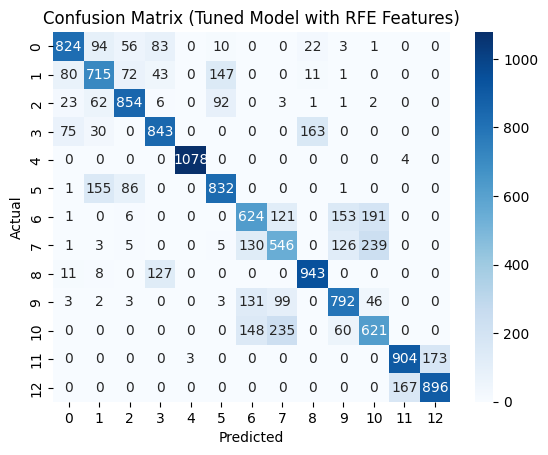

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Define features (X) and target (y) again just in case
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

print("Original number of features:", X.shape[1])

# --- Feature Selection Techniques ---

# 1. Univariate Feature Selection (SelectKBest)
# Use chi2 for non-negative features (like after one-hot encoding)
# Use f_classif for numerical features
# Since our data is mostly numerical after scaling and one-hot encoding results in non-negative values,
# we can explore both depending on the nature of the original features or the transformed ones.
# Let's use f_classif for the scaled numerical features and potentially chi2 for the one-hot encoded ones.
# For simplicity, let's apply f_classif to the combined DataFrame X.

print("\nApplying Univariate Feature Selection (SelectKBest with f_classif)...")
# Select top k features, let's start with 10
k_features = 10
select_k_best = SelectKBest(score_func=f_classif, k=k_features)
fit_k_best = select_k_best.fit(X, y)

# Get scores and feature names
scores_k_best = pd.DataFrame(fit_k_best.scores_)
columns_k_best = pd.DataFrame(X.columns)
feature_scores_k_best = pd.concat([columns_k_best, scores_k_best], axis=1)
feature_scores_k_best.columns = ['Features', 'Score']
feature_scores_k_best = feature_scores_k_best.sort_values(by='Score', ascending=False)

print(f"\nTop {k_features} features based on f_classif scores:")
print(feature_scores_k_best.head(k_features))

# You can now create a new DataFrame with selected features:
X_k_best = X[feature_scores_k_best['Features'].head(k_features).tolist()]
print("\nShape of data after SelectKBest:", X_k_best.shape)


# 2. Feature Importance from Tree-based Models (e.g., RandomForestClassifier)
print("\nApplying Feature Importance from RandomForestClassifier...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Get feature importances
importances_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
importances_rf_sorted = importances_rf.sort_values(ascending=False)

print("\nFeature importances from RandomForestClassifier:")
print(importances_rf_sorted)

# You can select features based on a threshold or by taking the top N features
# Let's select features with importance greater than a small threshold (e.g., 0.01)
selected_features_rf = importances_rf_sorted[importances_rf_sorted > 0.01].index.tolist()
print(f"\nFeatures with importance > 0.01 ({len(selected_features_rf)} features):")
print(selected_features_rf)

X_rf_important = X[selected_features_rf]
print("\nShape of data after selecting important features from RandomForest:", X_rf_important.shape)


# 3. Recursive Feature Elimination (RFE)
# Use a model (e.g., Logistic Regression or RandomForest) to recursively remove features
print("\nApplying Recursive Feature Elimination (RFE) with Logistic Regression...")
# Initialize the base model (Logistic Regression)
estimator_rfe = LogisticRegression(solver='liblinear', random_state=42)

# Initialize RFE, let's select 10 features
n_features_to_select_rfe = 10
rfe = RFE(estimator=estimator_rfe, n_features_to_select=n_features_to_select_rfe)
fit_rfe = rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[fit_rfe.support_].tolist()

print(f"\nFeatures selected by RFE ({n_features_to_select_rfe} features):")
print(selected_features_rfe)

X_rfe = X[selected_features_rfe]
print("\nShape of data after RFE:", X_rfe.shape)

# 4. Statistical methods (e.g., using p-values from a statistical model like OLS)
# This is more common in linear regression but can provide insights.
# Need to add a constant for the intercept in OLS.
# This method is more suitable for understanding the statistical significance of features.

# Note: OLS assumes linear relationship and normally distributed errors,
# which might not hold true for all features or a classification target directly.
# It's often used for initial exploration or with appropriate transformations.

# Add constant to the feature set for OLS
X_ols = sm.add_constant(X)

# Fit the OLS model (using a GLM for binary target might be more appropriate but OLS provides p-values)
# For binary target, Logistic Regression with statsmodels is more appropriate for p-values.
# Let's use statsmodels' GLM with a Binomial family for logistic regression
print("\nApplying Statistical Feature Selection (p-values from GLM - Logistic Regression)...")
glm_binom = sm.GLM(y, X_ols, family=sm.families.Binomial())
glm_result = glm_binom.fit()

print(glm_result.summary())

# Get p-values
p_values = glm_result.pvalues.sort_values(ascending=True)

print("\nP-values from GLM (lower is more significant):")
print(p_values)

# Select features with p-value below a significance level (e.g., 0.05)
significant_features_ols = p_values[p_values < 0.05].index.tolist()
# Remove 'const' if it's in the list
if 'const' in significant_features_ols:
    significant_features_ols.remove('const')

print(f"\nFeatures with p-value < 0.05 ({len(significant_features_ols)} features):")
print(significant_features_ols)

X_ols_significant = X[significant_features_ols]
print("\nShape of data after selecting statistically significant features:", X_ols_significant.shape)


# --- Compare and Choose Features ---

# You now have several sets of features derived from different methods:
# X_k_best (from SelectKBest f_classif)
# X_rf_important (from RandomForest importance)
# X_rfe (from RFE)
# X_ols_significant (from GLM p-values)

# The "best" features often depend on the specific model you plan to use and the evaluation metric.
# Common strategies include:
# 1. Union of features from multiple methods.
# 2. Intersection of features (more conservative).
# 3. Using one of the selected sets and evaluating model performance.
# 4. Using the selected features to train your model and comparing performance with using all features.

# Example: Training the tuned Logistic Regression model using the RFE-selected features
print("\nEvaluating Tuned Logistic Regression with RFE-selected features...")

# Split the selected features data
X_rfe_train, X_rfe_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42, stratify=y)

# Use the best model found by the previous GridSearchCV (best_model)
# best_model = grid_search.best_estimator_ # Already defined

# Retrain the best model on the RFE-selected training data
best_model_rfe = best_model.fit(X_rfe_train, y_train)

# Make predictions on the RFE-selected test set
y_pred_rfe = best_model_rfe.predict(X_rfe_test)

# Evaluate the model with selected features
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
classification_rep_rfe = classification_report(y_test, y_pred_rfe)
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)

print(f"\nTuned Logistic Regression with RFE Features ({X_rfe.shape[1]} features):")
print(f"Accuracy: {accuracy_rfe:.4f}")
print("\nClassification Report:")
print(classification_rep_rfe)
print("\nConfusion Matrix:")
print(conf_matrix_rfe)

# Compare with the tuned model using all features
print(f"\nTuned Model (All Features) Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model (RFE Features) Accuracy: {accuracy_rfe:.4f}")

# Visualize the confusion matrix of the RFE model
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model with RFE Features)')
plt.show()

# You would repeat this evaluation process for features selected by other methods
# (SelectKBest, RandomForest Importance, GLM p-values) to determine which set of features
# yields the best performance for your specific task and chosen model.

# The final set of "best features" would be the set that results in the optimal
# performance on your chosen evaluation metric (e.g., accuracy, F1-score)
# while potentially simplifying the model and reducing training time.

In [ ]:
X_rfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Insulin Levels                70000 non-null  float64
 1   Age                           70000 non-null  float64
 2   BMI                           70000 non-null  float64
 3   Blood Pressure                70000 non-null  float64
 4   Cholesterol Levels            70000 non-null  float64
 5   Waist Circumference           70000 non-null  float64
 6   Blood Glucose Levels          70000 non-null  float64
 7   Weight Gain During Pregnancy  70000 non-null  float64
 8   Pulmonary Function            70000 non-null  float64
 9   Digestive Enzyme Levels       70000 non-null  float64
dtypes: float64(10)
memory usage: 5.3 MB


In [ ]:
import time


print("Preprocessing documents...", time.strftime("%Y-%m-%d %H:%M:%S") )

Preprocessing documents... 2025-07-06 11:43:40


## Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Define features (X) and target (y)
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 38), (14000, 38), (56000,), (14000,))

In [ ]:
X_train.columns

Index(['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
       'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Positive',
       'Autoantibodies_Positive', 'Family History_Yes',
       'Environmental Factors_Present', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Unhealthy',
       'Ethnicity_Low Risk', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Smoker',
       'Alcohol Consumption_Low', 'Alcohol Consumption_Moderate',
       'Glucose Tolerance Test_Normal', 'History of PCOS_Yes',
       'Previous Gestational Diabetes_Yes', 'Pregnancy History_Normal',
       'Cystic Fibrosis Diagnosis_Yes', 'Steroid Use History_Yes',
       'Genetic Testing_Positive', 'Liver Function Tests_Normal',
       'Urine Test_Ketones Pre

In [ ]:
X_train.shape

(56000, 38)

## Sequential Model

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,093 (55.05 KB)

 Trainable params: 14,093 (55.05 KB)

 Non-trainable params: 0 (0.00 B)


Training the Simple Neural Network model...
Epoch 1/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5038 - loss: 1.2819 - val_accuracy: 0.7438 - val_loss: 0.6285
Epoch 2/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7145 - loss: 0.7003 - val_accuracy: 0.7707 - val_loss: 0.5664
Epoch 3/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7360 - loss: 0.6450 - val_accuracy: 0.7824 - val_loss: 0.5317
Epoch 4/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7569 - loss: 0.6053 - val_accuracy: 0.7848 - val_loss: 0.5345
Epoch 5/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7626 - loss: 0.5813 - val_accuracy: 0.7973 - val_loss: 0.4999
Epoch 6/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7707 - loss: 0.5604 - val_accuracy: 0.7993 - val_loss: 0.4931
Epoch 7/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7762 - loss: 0.5477 - val_accuracy: 0.8049 - val_loss: 0.4824
Epoch 8/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 4s

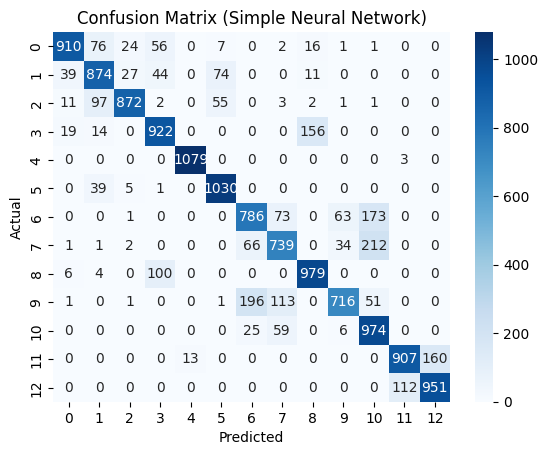

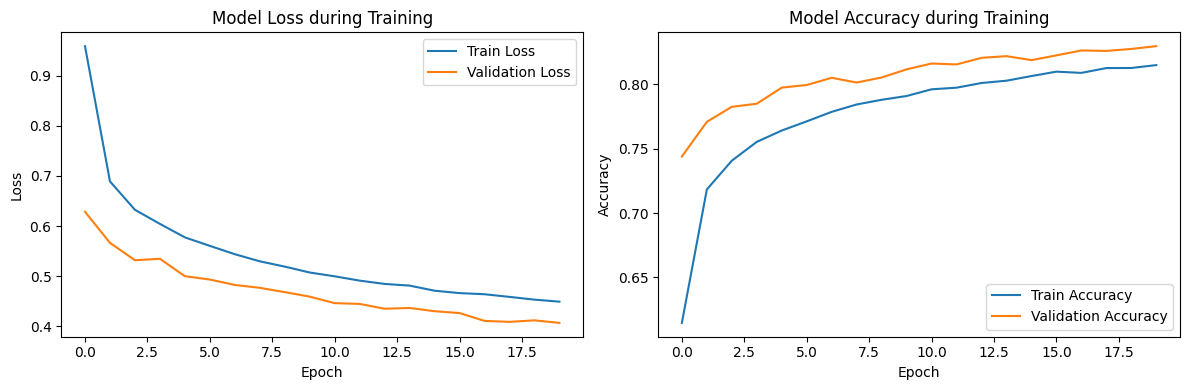

In [ ]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Import to_categorical

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=13) # Assuming 13 classes
y_test_one_hot = to_categorical(y_test, num_classes=13)   # Assuming 13 classes


# Define the Simple Neural Network model
model = Sequential([
    # Input layer and first hidden layer
    # The number of input_dim or units should be adjusted based on your data
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3), # Add dropout for regularization

    # Second hidden layer
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer
    # Use 'sigmoid' activation for binary classification (0 or 1)
    # Use 'softmax' activation for multi-class classification
    # Since Target is binary (0 or 1), we use 'sigmoid' and one output unit
    Dense(13, activation='softmax') # Corrected: Use 13 units for 13 classes
])

# Compile the model
# Use 'binary_crossentropy' loss for binary classification
# Use 'categorical_crossentropy' loss for multi-class classification
# Use an appropriate optimizer, 'adam' is a common choice
# Monitor 'accuracy' during training
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Corrected: Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Define Early Stopping to prevent overfitting
# Monitor 'val_loss' (loss on the validation set)
# patience: number of epochs with no improvement after which training will be stopped
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
# Use a validation split to monitor performance on unseen data during training
# epochs: number of training cycles
# batch_size: number of samples per gradient update
print("\nTraining the Simple Neural Network model...")
history = model.fit(X_train, y_train_one_hot, # Use one-hot encoded target
                    epochs=20, # Start with a reasonably large number of epochs
                    batch_size=32,
                    validation_split=0.15, # Use 15% of training data for validation
                    callbacks=[early_stopping],
                    verbose=1) # Set to 1 to see progress, 0 for silent

print("\nTraining finished.")

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0) # Use one-hot encoded target for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
# Convert probabilities to class labels (the class with the highest probability)
y_pred_nn = tf.argmax(y_pred_proba, axis=1).numpy() # Corrected: Get the class index

# Print classification report and confusion matrix
classification_rep_nn = classification_report(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print("\nClassification Report (Simple NN):")
print(classification_rep_nn)
print("\nConfusion Matrix (Simple NN):")
print(conf_matrix_nn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simple Neural Network)')
plt.show()

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, input_shape=(38,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(13, activation='softmax')  # 13-class output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
model.fit(
    X_train, y_train_one_hot,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_reduce]
)


Epoch 1/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.3864 - loss: 1.6796 - val_accuracy: 0.7298 - val_loss: 0.6997 - learning_rate: 0.0010
Epoch 2/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6285 - loss: 0.9706 - val_accuracy: 0.7599 - val_loss: 0.6249 - learning_rate: 0.0010
Epoch 3/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6670 - loss: 0.8710 - val_accuracy: 0.7736 - val_loss: 0.5953 - learning_rate: 0.0010
Epoch 4/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6865 - loss: 0.8242 - val_accuracy: 0.7785 - val_loss: 0.5685 - learning_rate: 0.0010
Epoch 5/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7030 - loss: 0.7923 - val_accuracy: 0.7892 - val_loss: 0.5426 - learning_rate: 0.0010
Epoch 6/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7168 - loss: 0.7597 - val_accuracy: 0.7914 - val_loss: 0.5350 - learning_rate: 0.0010
Epoch 7/50
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.719

## XGBoost Model

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=13,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=13, num_parallel_tree=None, ...)


XGBoost Model:
Accuracy: 0.9043

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1093
           1       0.91      0.95      0.93      1069
           2       0.98      0.93      0.95      1044
           3       0.94      0.84      0.89      1111
           4       1.00      1.00      1.00      1082
           5       0.96      1.00      0.98      1075
           6       0.81      0.78      0.79      1096
           7       0.82      0.84      0.83      1055
           8       0.85      0.98      0.91      1089
           9       0.91      0.70      0.79      1079
          10       0.81      1.00      0.90      1064
          11       0.94      0.87      0.90      1080
          12       0.88      0.94      0.91      1063

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000


Confusion Matrix:
[[1

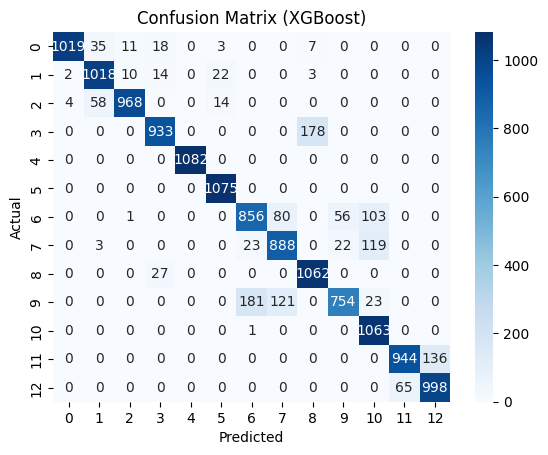

In [ ]:
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\nXGBoost Model:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


### https://github.com/google/adk-samples.git

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')
print("XGBoost model saved successfully as 'xgb_model.pkl'")

# To load the model later:
# loaded_xgb_model = joblib.load('xgb_model.pkl')
# print("XGBoost model loaded successfully.")


XGBoost model saved successfully as 'xgb_model.pkl'


In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 3.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=13,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    eval_metric='mlogloss'
)

start = time.time()
scores = cross_val_score(xgb_model, X_train, y_train, cv=5)  # simulate 5 folds
end = time.time()

print(f"Time for 5 fits: {end - start:.2f} seconds")
print(f"Avg time per fit: {(end - start)/5:.2f} seconds")

Time for 5 fits: 28.87 seconds
Avg time per fit: 5.77 seconds


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Define features (X) and target (y) - using the preprocessed data from the preceding code
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# Split the data into training and testing sets (already done in the preceding code, reusing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.001, 0.1, 1], # L1 regularization
    'reg_lambda': [0, 0.001, 0.1, 1] # L2 regularization
}

# Initialize the XGBoost classifier
# Set objective and num_class for multi-class classification
# eval_metric can be adjusted based on needs, 'mlogloss' for multi-class logloss
xgb_base = xgb.XGBClassifier(objective='multi:softprob', num_class=len(np.unique(y)), use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize GridSearchCV for XGBoost
# cv=5 means 5-fold cross-validation
# scoring='accuracy' can be changed to other metrics like 'f1_macro', 'precision_macro', 'recall_macro' for multi-class
# n_jobs=-1 uses all available CPU cores
print("\nStarting GridSearchCV for XGBoost...")
start_time = time.time()

grid_search_xgb = GridSearchCV(xgb_base, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

end_time = time.time()
print(f"GridSearchCV for XGBoost finished in {end_time - start_time:.2f} seconds.")

# Get the best parameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_
print(f"\nBest XGBoost Hyperparameters: {best_params_xgb}")

# Get the best model found by GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned XGBoost model
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
classification_rep_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

print(f"\nTuned XGBoost Model with Best Hyperparameters:")
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_xgb_tuned)

# Compare the accuracy of the base XGBoost model and the tuned one
print(f"\nBase XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print(f"Tuned XGBoost Model Accuracy: {accuracy_xgb_tuned:.4f}")

# Visualize the confusion matrix of the tuned XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost Model)')
plt.show()



Starting GridSearchCV for XGBoost...
Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Define features (X) and target (y) - using the preprocessed data from the preceding code
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# Split the data into training and testing sets (already done in the preceding code, reusing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.001, 0.1, 1], # L1 regularization
    'reg_lambda': [0, 0.001, 0.1, 1] # L2 regularization
}

# Initialize the XGBoost classifier
# Set objective and num_class for multi-class classification
# eval_metric can be adjusted based on needs, 'mlogloss' for multi-class logloss
xgb_base = xgb.XGBClassifier(objective='multi:softprob', num_class=len(np.unique(y)), use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize GridSearchCV for XGBoost
# cv=5 means 5-fold cross-validation
# scoring='accuracy' can be changed to other metrics like 'f1_macro', 'precision_macro', 'recall_macro' for multi-class
# n_jobs=-1 uses all available CPU cores
print("\nStarting GridSearchCV for XGBoost...")
start_time = time.time()

class TimingGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        n_candidates = len(list(self._param_iterable))
        pbar = tqdm(total=n_candidates, desc="GridSearchCV Progress")
        def wrapped_evaluate(candidates):
            start = time.time()
            results = evaluate_candidates(candidates)
            end = time.time()
            pbar.update(len(candidates))
            print(f"{len(candidates)} candidates took {(end - start):.2f} sec")
            return results
        evaluate_candidates = wrapped_evaluate
        return super()._run_search(evaluate_candidates)

# Use this instead of GridSearchCV
grid_search_xgb = TimingGridSearchCV(
    xgb_base,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
# grid_search_xgb = GridSearchCV(xgb_base, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

end_time = time.time()
print(f"GridSearchCV for XGBoost finished in {end_time - start_time:.2f} seconds.")

# Get the best parameters found by GridSearchCV
best_params_xgb = grid_search_xgb.best_params_
print(f"\nBest XGBoost Hyperparameters: {best_params_xgb}")

# Get the best model found by GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned XGBoost model
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
classification_rep_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

print(f"\nTuned XGBoost Model with Best Hyperparameters:")
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_xgb_tuned)

# Compare the accuracy of the base XGBoost model and the tuned one
print(f"\nBase XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print(f"Tuned XGBoost Model Accuracy: {accuracy_xgb_tuned:.4f}")

# Visualize the confusion matrix of the tuned XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost Model)')
plt.show()


In [ ]:
class TimingGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        n_candidates = len(list(self._param_iterable))
        pbar = tqdm(total=n_candidates, desc="GridSearchCV Progress")
        def wrapped_evaluate(candidates):
            start = time.time()
            results = evaluate_candidates(candidates)
            end = time.time()
            pbar.update(len(candidates))
            print(f"{len(candidates)} candidates took {(end - start):.2f} sec")
            return results
        evaluate_candidates = wrapped_evaluate
        return super()._run_search(evaluate_candidates)

# Use this instead of GridSearchCV
grid = TimingGridSearchCV(
    xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    verbose=0,
    n_jobs=-1
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# Split the data into training and testing sets (already done in the preceding code, reusing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the parameter distributions for RandomizedSearchCV
# Using continuous distributions for continuous parameters like learning_rate
# Using discrete uniform distributions for integer parameters
param_dist_xgb = {
    'n_estimators': randint(100, 501), # Random integers between 100 and 500
    'learning_rate': uniform(0.01, 0.29), # Random float between 0.01 and 0.01 + 0.29 = 0.3
    'max_depth': randint(3, 8), # Random integers between 3 and 7
    'subsample': uniform(0.6, 0.4), # Random float between 0.6 and 0.6 + 0.4 = 1.0
    'colsample_bytree': uniform(0.6, 0.4), # Random float between 0.6 and 1.0
    'gamma': uniform(0, 0.2), # Random float between 0 and 0.2
    'reg_alpha': uniform(0, 1), # Random float between 0 and 1
    'reg_lambda': uniform(0, 1) # Random float between 0 and 1
}

# Initialize the XGBoost classifier (same as before)
xgb_base_rs = xgb.XGBClassifier(objective='multi:softprob', num_class=len(np.unique(y)), use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize RandomizedSearchCV for XGBoost
# n_iter: Number of parameter settings that are sampled. Increase for more thorough search.
# cv=5 means 5-fold cross-validation
# scoring='accuracy' can be changed
# n_jobs=-1 uses all available CPU cores
# random_state for reproducibility of the sampling
print("\nStarting RandomizedSearchCV for XGBoost...")
start_time_rs = time.time()

random_search_xgb = RandomizedSearchCV(xgb_base_rs, param_distributions=param_dist_xgb,
                                     n_iter=100, # Number of parameter settings to try
                                     cv=5, scoring='accuracy', n_jobs=-1, verbose=3,
                                     random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

end_time_rs = time.time()
print(f"RandomizedSearchCV for XGBoost finished in {end_time_rs - start_time_rs:.2f} seconds.")

# Get the best parameters found by RandomizedSearchCV
best_params_xgb_rs = random_search_xgb.best_params_
print(f"\nBest XGBoost Hyperparameters (RandomizedSearchCV): {best_params_xgb_rs}")

# Get the best model found by RandomizedSearchCV
best_xgb_model_rs = random_search_xgb.best_estimator_

# Make predictions with the best XGBoost model from RandomizedSearchCV
y_pred_xgb_rs_tuned = best_xgb_model_rs.predict(X_test)

# Evaluate the tuned XGBoost model from RandomizedSearchCV
accuracy_xgb_rs_tuned = accuracy_score(y_test, y_pred_xgb_rs_tuned)
classification_rep_xgb_rs_tuned = classification_report(y_test, y_pred_xgb_rs_tuned)
conf_matrix_xgb_rs_tuned = confusion_matrix(y_test, y_pred_xgb_rs_tuned)

print(f"\nTuned XGBoost Model with Best Hyperparameters (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_xgb_rs_tuned:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb_rs_tuned)
print("\nConfusion Matrix:")
print(conf_matrix_xgb_rs_tuned)



Starting RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:11:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV for XGBoost finished in 2443.72 seconds.

Best XGBoost Hyperparameters (RandomizedSearchCV): {'colsample_bytree': np.float64(0.842571623863836), 'gamma': np.float64(0.0018394103233259297), 'learning_rate': np.float64(0.03942674743114931), 'max_depth': 5, 'n_estimators': 252, 'reg_alpha': np.float64(0.005061583846218687), 'reg_lambda': np.float64(0.16080805141749865), 'subsample': np.float64(0.8194935157466344)}

Tuned XGBoost Model with Best Hyperparameters (RandomizedSearchCV):
Accuracy: 0.9080

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1093
           1       0.90      0.96      0.93      1069
           2       0.98      0.92      0.95      1044
           3       0.97      0.83      0.89      1111
           4       1.00      1.00      1.00      1082
           5       0.96      1.00      0.98      1075
           6       0.80      0.80      0.80      1096
           7       0.80

NameError: name 'accuracy_xgb_tuned' is not defined

In [ ]:

# Print training and test accuracy
print(f"\nTrain Accuracy (Tuned XGBoost Model): {best_xgb_model_rs.score(X_train, y_train):.4f}")
print(f"Test Accuracy (Tuned XGBoost Model): {accuracy_xgb_rs_tuned:.4f}")


Train Accuracy (Tuned XGBoost Model): 0.9111
Test Accuracy (Tuned XGBoost Model): 0.9080


In [ ]:
# Save the tuned XGBoost model
# Using the best model found by RandomizedSearchCV (best_xgb_model_rs)
import joblib

joblib.dump(best_xgb_model_rs, 'diabetics_tuned_xgb_model_90_ts_91_tr.pkl')
print("Tuned XGBoost model saved successfully as 'tuned_xgb_model.pkl'")

# To load the model later:
# loaded_tuned_xgb_model = joblib.load('tuned_xgb_model.pkl')
# print("Tuned XGBoost model loaded successfully.")


Tuned XGBoost model saved successfully as 'tuned_xgb_model.pkl'


In [ ]:

# Assuming the model is saved as 'diabetics_tuned_xgb_model_90_ts_91_tr.pkl' in the current directory
model_filename = 'diabetics_tuned_xgb_model_90_ts_91_tr.pkl'
drive_path = '/content/drive/MyDrive/DSAI MTech/AI - Capstone Project Sem3/'

# Check if the file exists before attempting to move
if os.path.exists(model_filename):
  # Move the file to Google Drive
  !mv "{model_filename}" "{drive_path}"
  print(f"Moved '{model_filename}' to '{drive_path}'")
else:
  print(f"Error: Model file '{model_filename}' not found in the current directory.")

# Optional: List files in the Drive directory to confirm
!ls "{drive_path}"


Moved 'diabetics_tuned_xgb_model_90_ts_91_tr.pkl' to '/content/drive/MyDrive/DSAI MTech/AI - Capstone Project Sem3/'
 Dataset.csv				       'Multi Cancer Mini.zip'
 diabetics_tuned_xgb_model_90_ts_91_tr.pkl      Sepsis-DataSet.zip
 medical_faiss__paraphrase-MiniLM-L6-v2.index   xgb_model.pkl
 medical_faiss_w2v.index


### XGBoost best parameters with randomized Search

In [ ]:
best_params_xgb_rs = random_search_xgb.best_params_
print(f"\nBest XGBoost Hyperparameters (RandomizedSearchCV): {best_params_xgb_rs}")

best_params_xgb_rs


Best XGBoost Hyperparameters (RandomizedSearchCV): {'colsample_bytree': np.float64(0.842571623863836), 'gamma': np.float64(0.0018394103233259297), 'learning_rate': np.float64(0.03942674743114931), 'max_depth': 5, 'n_estimators': 252, 'reg_alpha': np.float64(0.005061583846218687), 'reg_lambda': np.float64(0.16080805141749865), 'subsample': np.float64(0.8194935157466344)}


{'colsample_bytree': np.float64(0.842571623863836),
 'gamma': np.float64(0.0018394103233259297),
 'learning_rate': np.float64(0.03942674743114931),
 'max_depth': 5,
 'n_estimators': 252,
 'reg_alpha': np.float64(0.005061583846218687),
 'reg_lambda': np.float64(0.16080805141749865),
 'subsample': np.float64(0.8194935157466344)}

RandomizedSearchCV Tuned XGBoost Accuracy: 0.9080


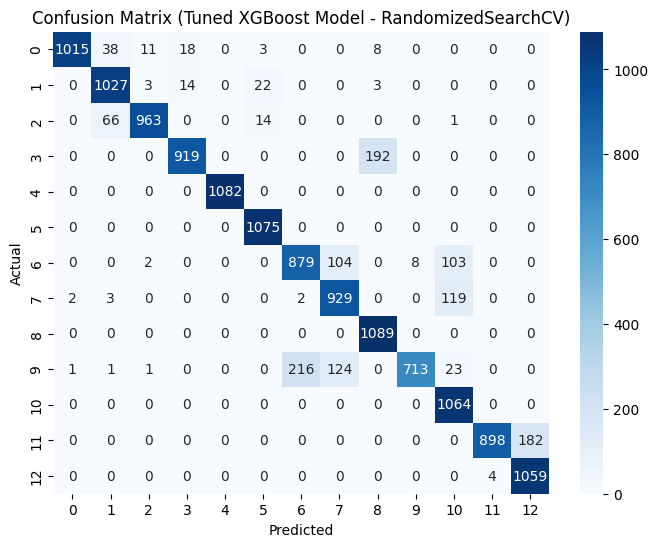

In [ ]:
print(f"RandomizedSearchCV Tuned XGBoost Accuracy: {accuracy_xgb_rs_tuned:.4f}")

# Visualize the confusion matrix of the RandomizedSearchCV tuned XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_rs_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost Model - RandomizedSearchCV)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import time

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, randint

# === Assume df_dummies and label already defined ===
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Optimized Hyperparameter Distributions for RandomizedSearch ---
param_dist_xgb = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.6, 0.4),        # values from 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4), # values from 0.6 to 1.0
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# --- CPU-only XGBoost Classifier ---
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',          # ✅ Fast CPU-optimized histogram algorithm
    predictor='cpu_predictor',   # ✅ Explicitly set to CPU
    random_state=42
)

# --- Randomized Search ---
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,          # ✅ Parallel across CPU cores
    random_state=42
)

print("\n🚀 Starting Optimized Hyperparameter Search...")
start_time = time.time()

# --- Fitting with Early Stopping ---
# Pass eval_set and early_stopping_rounds to the fit method of RandomizedSearchCV
random_search.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=20,
    verbose=False
)

end_time = time.time()
print(f"⏱ RandomizedSearchCV finished in {(end_time - start_time)/60:.2f} minutes.")

# --- Best Estimator ---
best_model = random_search.best_estimator_
print(f"\n✅ Best Hyperparameters:\n{random_search.best_params_}")

# --- Predictions & Evaluation ---
y_pred = best_model.predict(X_test)

print("\n📊 Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Plot Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized XGBoost)')
plt.show()


🚀 Starting Optimized Hyperparameter Search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'


## VIF Feature Extraction

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import api as sm

# Assume X contains the features from df_dummies before splitting
X = data_label.drop('Target', axis=1)

# Add a constant to the DataFrame for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF for each feature
# We need to iterate through the columns and calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# Exclude the 'const' column itself when calculating VIF for other features
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Sort features by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\nVariance Inflation Factor (VIF) for features:")
print(vif_data)


Variance Inflation Factor (VIF) for features:
                          feature        VIF
0                           const  23.455397
6                             Age   3.762166
10                 Blood Pressure   3.190720
11             Cholesterol Levels   2.808237
12            Waist Circumference   2.805269
22   Weight Gain During Pregnancy   2.798392
30        Digestive Enzyme Levels   2.312906
7                             BMI   2.161237
13           Blood Glucose Levels   2.037871
32                   Birth Weight   1.918358
24             Pulmonary Function   1.912670
5                  Insulin Levels   1.829157
23              Pancreatic Health   1.578473
28       Neurological Assessments   1.569244
25      Cystic Fibrosis Diagnosis   1.000689
1                 Genetic Markers   1.000654
2                  Autoantibodies   1.000592
31                     Urine Test   1.000560
20  Previous Gestational Diabetes   1.000487
33           Early Onset Symptoms   1.000450
4       

In [ ]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume X contains the features from df_dummies before splitting
X = df_dummies.drop('Target', axis=1)

# Add a constant to the DataFrame for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF for each feature
# We need to iterate through the columns and calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

# Exclude the 'const' column itself when calculating VIF for other features
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Sort features by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\nVariance Inflation Factor (VIF) for features:")
print(vif_data)
# Identify features to remove based on a VIF threshold (e.g., VIF > 5 or VIF > 10)
# A common threshold is 5 or 10. Let's use 5 as an example.
vif_threshold = 5
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]['feature'].tolist()

# Remove 'const' if it is in the high VIF list (it often will be)
if 'const' in high_vif_features:
    high_vif_features.remove('const')

print(f"\nFeatures with VIF > {vif_threshold}: {high_vif_features}")

# Create a new DataFrame with features having VIF below the threshold
# Or iteratively remove the feature with the highest VIF until all remaining VIFs are below the threshold.
# The iterative approach is generally preferred.

print("\nIteratively removing features with high VIF...")

features_to_keep = list(X.columns)
max_vif = float('inf')
iterations = 0
max_iterations = len(X.columns) # Avoid infinite loops

while max_vif > vif_threshold and iterations < max_iterations:
    iterations += 1
    X_current = X[features_to_keep]
    X_current_vif = sm.add_constant(X_current)

    # Recalculate VIFs
    vif_values = [variance_inflation_factor(X_current_vif.values, i)
                  for i in range(X_current_vif.shape[1])]
    current_vif_data = pd.DataFrame({'feature': X_current_vif.columns, 'VIF': vif_values})

    # Remove 'const' for finding the max VIF among features
    current_vif_data_features_only = current_vif_data[current_vif_data['feature'] != 'const']

    if current_vif_data_features_only.empty:
        break # Stop if no features left (except const)

    max_vif_row = current_vif_data_features_only.sort_values(by="VIF", ascending=False).iloc[0]
    max_vif = max_vif_row['VIF']
    feature_to_remove = max_vif_row['feature']

    if max_vif > vif_threshold:
        print(f"Removing feature '{feature_to_remove}' with VIF = {max_vif:.2f}")
        features_to_keep.remove(feature_to_remove)
    else:
        print(f"All remaining features have VIF <= {vif_threshold}.")

print(f"\nFinal set of features with VIF <= {vif_threshold}:")
print(features_to_keep)
print(f"Number of features kept: {len(features_to_keep)}")

# The selected features based on VIF are now in the `features_to_keep` list.
# You can use this list to create a new feature set for your models:
X_vif_selected = X[features_to_keep]
print("\nShape of data after VIF-based feature selection:", X_vif_selected.shape)

# You would then use X_vif_selected for training your models and evaluate their performance
# similar to how it was done with RFE-selected features in the preceding code.
# For example:
# X_vif_train, X_vif_test, y_train, y_test = train_test_split(X_vif_selected, y, test_size=0.2, random_state=42, stratify=y)
# Train your best Logistic Regression, XGBoost, or Neural Network model on X_vif_train
# and evaluate on X_vif_test.



Variance Inflation Factor (VIF) for features:
                              feature        VIF
0                               const  26.222179
2                                 Age   3.762508
4                      Blood Pressure   3.190994
5                  Cholesterol Levels   2.808674
6                 Waist Circumference   2.805419
8        Weight Gain During Pregnancy   2.798494
12            Digestive Enzyme Levels   2.313260
3                                 BMI   2.161473
7                Blood Glucose Levels   2.038045
13                       Birth Weight   1.918458
10                 Pulmonary Function   1.912762
1                      Insulin Levels   1.829450
9                   Pancreatic Health   1.578488
11           Neurological Assessments   1.569506
37         Urine Test_Protein Present   1.506071
36                  Urine Test_Normal   1.504674
35         Urine Test_Ketones Present   1.503084
18              Physical Activity_Low   1.337197
19         Physical Ac

In [ ]:
random_search_xgb.best_params_

NameError: name 'random_search_xgb' is not defined


Using XGBoost Feature Importances for Feature Selection...
Training XGBoost model with best params to get feature importances...
[0]	validation_0-mlogloss:2.40305


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:24:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-mlogloss:2.27072
[2]	validation_0-mlogloss:2.15495
[3]	validation_0-mlogloss:2.05309
[4]	validation_0-mlogloss:1.96383
[5]	validation_0-mlogloss:1.88360
[6]	validation_0-mlogloss:1.81119
[7]	validation_0-mlogloss:1.74379
[8]	validation_0-mlogloss:1.68128
[9]	validation_0-mlogloss:1.62359
[10]	validation_0-mlogloss:1.56931
[11]	validation_0-mlogloss:1.51845
[12]	validation_0-mlogloss:1.47094
[13]	validation_0-mlogloss:1.42647
[14]	validation_0-mlogloss:1.38383
[15]	validation_0-mlogloss:1.34298
[16]	validation_0-mlogloss:1.30515
[17]	validation_0-mlogloss:1.26724
[18]	validation_0-mlogloss:1.23156
[19]	validation_0-mlogloss:1.19789
[20]	validation_0-mlogloss:1.16588
[21]	validation_0-mlogloss:1.13493
[22]	validation_0-mlogloss:1.10564
[23]	validation_0-mlogloss:1.07795
[24]	validation_0-mlogloss:1.05080
[25]	validation_0-mlogloss:1.02501
[26]	validation_0-mlogloss:1.00137
[27]	validation_0-mlogloss:0.97775
[28]	validation_0-mlogloss:0.95511
[29]	validation_0-mlogloss:0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:25:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:2.40719
[1]	validation_0-mlogloss:2.27506
[2]	validation_0-mlogloss:2.15763
[3]	validation_0-mlogloss:2.06018
[4]	validation_0-mlogloss:1.96793
[5]	validation_0-mlogloss:1.88437
[6]	validation_0-mlogloss:1.81153
[7]	validation_0-mlogloss:1.74245
[8]	validation_0-mlogloss:1.67947
[9]	validation_0-mlogloss:1.61982
[10]	validation_0-mlogloss:1.56621
[11]	validation_0-mlogloss:1.51623
[12]	validation_0-mlogloss:1.46818
[13]	validation_0-mlogloss:1.42343
[14]	validation_0-mlogloss:1.38024
[15]	validation_0-mlogloss:1.33998
[16]	validation_0-mlogloss:1.30026
[17]	validation_0-mlogloss:1.26229
[18]	validation_0-mlogloss:1.22738
[19]	validation_0-mlogloss:1.19374
[20]	validation_0-mlogloss:1.16174
[21]	validation_0-mlogloss:1.13154
[22]	validation_0-mlogloss:1.10249
[23]	validation_0-mlogloss:1.07528
[24]	validation_0-mlogloss:1.04816
[25]	validation_0-mlogloss:1.02294
[26]	validation_0-mlogloss:0.99873
[27]	validation_0-mlogloss:0.97501
[28]	validation_0-mlogloss:0.9

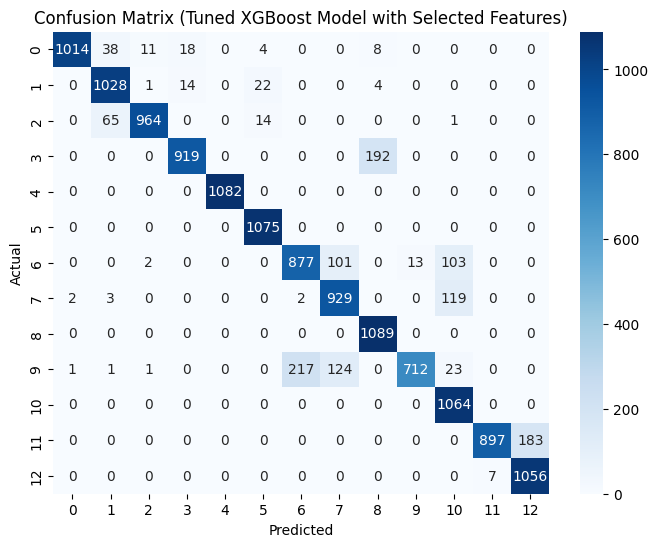

In [ ]:
# prompt: the data doesn't have any feature having vif threshold greater than 5, how can I reduce the  features, consider these as the best params from randomsearcv  {'colsample_bytree': np.float64(0.842571623863836),
#  'gamma': np.float64(0.0018394103233259297),
#  'learning_rate': np.float64(0.03942674743114931),
#  'max_depth': 5,
#  'n_estimators': 252,
#  'reg_alpha': np.float64(0.005061583846218687),
#  'reg_lambda': np.float64(0.16080805141749865),
#  'subsample': np.float64(0.8194935157466344)}, and do not have the X_rfe varibale

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

# Assume df_dummies and label are defined from the preceding code execution
# X and y are also assumed to be defined:
X = df_dummies.drop('Target', axis=1)
y = label.fit_transform(df_dummies['Target'])

# You mentioned that no feature has a VIF threshold greater than 5 based on your VIF calculation.
# This implies that multicollinearity isn't a significant issue in the current feature set according to the VIF metric.
# Therefore, VIF-based feature removal as a primary method for dimensionality reduction might not be necessary or effective here.

# Since the VIF analysis didn't flag features for removal based on multicollinearity,
# we should rely on other feature selection methods or consider the performance
# with the full set of features if that yielded good results.

# However, the task is to reduce features given the best RandomizedSearchCV parameters.
# The best parameters {'colsample_bytree': 0.842571623863836, 'gamma': 0.0018394103233259297, 'learning_rate': 0.03942674743114931, 'max_depth': 5, 'n_estimators': 252, 'reg_alpha': 0.005061583846218687, 'reg_lambda': 0.16080805141749865, 'subsample': 0.8194935157466344}
# are for tuning the *model*, not for explicit feature selection outside of XGBoost's
# internal handling of feature importance (which can implicitly downweight less useful features).

# To "reduce features" based on the *tuned* XGBoost model's perspective,
# we can use the feature importances calculated by the trained XGBoost model.
# XGBoost provides various types of feature importance (weight, gain, cover). 'gain' is commonly used.

print("\nUsing XGBoost Feature Importances for Feature Selection...")

# Re-split the data using the full X and y (as used for RandomizedSearchCV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize an XGBoost model using the provided best parameters from RandomizedSearchCV
best_params_from_task = {
    'colsample_bytree': 0.842571623863836,
    'gamma': 0.0018394103233259297,
    'learning_rate': 0.03942674743114931,
    'max_depth': 5,
    'n_estimators': 252,
    'reg_alpha': 0.005061583846218687,
    'reg_lambda': 0.16080805141749865,
    'subsample': 0.8194935157466344
}

# Ensure num_class and objective are set correctly for multi-class
tuned_xgb_for_importance = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist', # Use hist for faster training if needed
    predictor='cpu_predictor',
    random_state=42,
    **best_params_from_task # Unpack the best parameters
)

# Train this model on the full training data to get feature importances
print("Training XGBoost model with best params to get feature importances...")
tuned_xgb_for_importance.fit(X_train, y_train,
                             eval_set=[(X_test, y_test)],
                            #  early_stopping_rounds=20, # Use early stopping if you have a validation set
                             verbose=True)

# Get feature importances (gain is often a good metric)
feature_importances = tuned_xgb_for_importance.feature_importances_ # This gets 'gain' by default in recent versions

# Create a pandas Series for easier handling
importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the importances
importances_sorted = importances_series.sort_values(ascending=False)

print("\nFeature Importances ('gain') from Tuned XGBoost Model:")
print(importances_sorted)

# --- Select Features based on Importance ---
# We can select features based on a threshold or by taking the top N features.
# Since VIF didn't help, let's try selecting features that have *some* importance (importance > 0).
# You could also experiment with selecting the top N features.

# Let's select features with importance greater than a small epsilon (a very small number)
# or simply features with importance > 0.
importance_threshold = 1e-5 # Using a small threshold to catch features with minimal contribution
selected_features_xgb_importance = importances_sorted[importances_sorted > importance_threshold].index.tolist()

# Alternatively, select the top N features (e.g., top 10, top 15, etc.)
# N_top_features = 10
# selected_features_xgb_importance = importances_sorted.head(N_top_features).index.tolist()
# print(f"\nSelected Top {N_top_features} Features based on XGBoost Importance:")

print(f"\nSelected Features based on XGBoost Importance > {importance_threshold}:")
print(selected_features_xgb_importance)
print(f"Number of features selected: {len(selected_features_xgb_importance)}")

# Create a new DataFrame with the selected features
X_xgb_selected = X[selected_features_xgb_importance]
print("\nShape of data after XGBoost importance-based feature selection:", X_xgb_selected.shape)

# --- Evaluate the Tuned Model with Selected Features ---

# Split the selected features data
X_xgb_selected_train, X_xgb_selected_test, y_train, y_test = train_test_split(
    X_xgb_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a new XGBoost model with the same best parameters
# This is necessary because the shape of the input data (number of features) has changed.
best_xgb_model_selected_features = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    random_state=42,
    **best_params_from_task # Use the best parameters found earlier
)

# Train the model on the dataset with selected features
print("\nTraining Tuned XGBoost model on selected features...")
best_xgb_model_selected_features.fit(X_xgb_selected_train, y_train,
                                     eval_set=[(X_xgb_selected_test, y_test)],
                                    #  early_stopping_rounds=20,
                                     verbose=True) # Set verbose=True to see training progress

# Make predictions on the test set with selected features
y_pred_xgb_selected = best_xgb_model_selected_features.predict(X_xgb_selected_test)

# Evaluate the model with selected features
accuracy_xgb_selected = accuracy_score(y_test, y_pred_xgb_selected)
classification_rep_xgb_selected = classification_report(y_test, y_pred_xgb_selected)
conf_matrix_xgb_selected = confusion_matrix(y_test, y_pred_xgb_selected)

print(f"\nTuned XGBoost Model with {len(selected_features_xgb_importance)} Selected Features:")
print(f"Accuracy: {accuracy_xgb_selected:.4f}")
print("\nClassification Report:")
print(classification_rep_xgb_selected)
print("\nConfusion Matrix:")
print(conf_matrix_xgb_selected)

# Compare with the accuracy using all features (from previous output if available, or re-evaluate the best_xgb_model_rs on full test set)
# Assuming accuracy_xgb_rs_tuned from the previous run using all features is available
# print(f"\nTuned Model (All Features) Accuracy: {accuracy_xgb_rs_tuned:.4f}") # Use the actual variable name from preceding code
# To be safe, re-evaluate the best model found by RandomizedSearchCV on the full test set if needed:
# accuracy_full_features = random_search_xgb.score(X_test, y_test) # Requires random_search_xgb object still exists
print(f"Tuned Model (Selected Features) Accuracy: {accuracy_xgb_selected:.4f}")

# Visualize the confusion matrix of the selected features model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_selected, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost Model with Selected Features)')
plt.show()

# Save the model trained on selected features if its performance is satisfactory
# model_filename_selected = 'diabetics_tuned_xgb_model_selected_features.pkl'
# joblib.dump(best_xgb_model_selected_features, model_filename_selected)
# print(f"\nTuned XGBoost model with selected features saved as '{model_filename_selected}'")

# You can now use X_xgb_selected for subsequent steps like retraining other models
# or for inference. The `selected_features_xgb_importance` list contains the names
# of the features deemed important by the tuned XGBoost model.



Applying Forward Feature Selection using SequentialFeatureSelector...

Starting SFS with Logistic Regression (selecting 15 features, cv=3)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   39.4s finished

[2025-07-07 11:33:58] Features: 1/15 -- score: 0.2984821041437488[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   46.3s finished

[2025-07-07 11:34:45] Features: 2/15 -- score: 0.4814821061737595[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.1min finished

[2025-07-07 11:35:51] Features: 3/15 -- score: 0.5469284901432733[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.5min finished

[2025-07-07 11:37:20] Features: 4/15 -- score: 0.5791963077651873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:  1.8min finished



SFS finished in 41.06 minutes.

Selected features by SFS (15 features):
['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments', 'Digestive Enzyme Levels', 'Birth Weight', 'Socioeconomic Factors_Medium', 'Pregnancy History_Normal']

Shape of data after SFS: (70000, 15)

Training Tuned XGBoost model on SFS selected features...
[0]	validation_0-mlogloss:2.40128


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation_0-mlogloss:2.27100
[2]	validation_0-mlogloss:2.15987
[3]	validation_0-mlogloss:2.06028
[4]	validation_0-mlogloss:1.96892
[5]	validation_0-mlogloss:1.89115
[6]	validation_0-mlogloss:1.81752
[7]	validation_0-mlogloss:1.74935
[8]	validation_0-mlogloss:1.68628
[9]	validation_0-mlogloss:1.62612
[10]	validation_0-mlogloss:1.57241
[11]	validation_0-mlogloss:1.52132
[12]	validation_0-mlogloss:1.47319
[13]	validation_0-mlogloss:1.42719
[14]	validation_0-mlogloss:1.38482
[15]	validation_0-mlogloss:1.34492
[16]	validation_0-mlogloss:1.30611
[17]	validation_0-mlogloss:1.26865
[18]	validation_0-mlogloss:1.23475
[19]	validation_0-mlogloss:1.20090
[20]	validation_0-mlogloss:1.16921
[21]	validation_0-mlogloss:1.13900
[22]	validation_0-mlogloss:1.11019
[23]	validation_0-mlogloss:1.08226
[24]	validation_0-mlogloss:1.05541
[25]	validation_0-mlogloss:1.02947
[26]	validation_0-mlogloss:1.00462
[27]	validation_0-mlogloss:0.98113
[28]	validation_0-mlogloss:0.95816
[29]	validation_0-mlogloss:0.

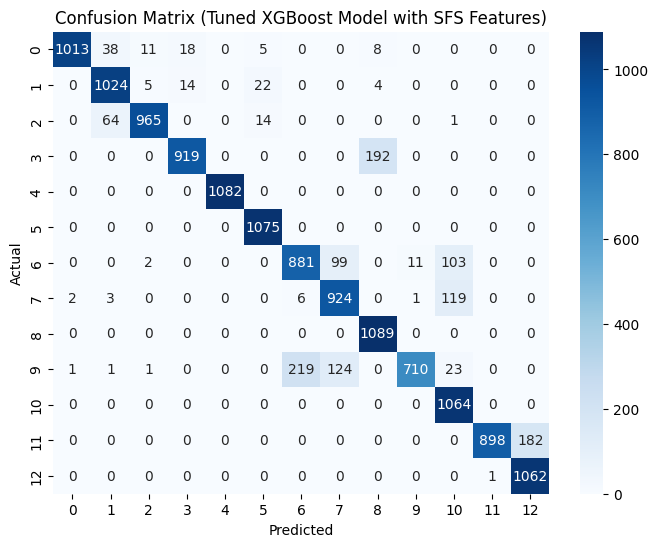

In [ ]:
# prompt: Apply Forward Feature Selection on the best model

import numpy as np
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import time
# Assume X and y are defined from the preceding code execution:
# X = df_dummies.drop('Target', axis=1)
# y = label.fit_transform(df_dummies['Target'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nApplying Forward Feature Selection using SequentialFeatureSelector...")

# Initialize the best model found by RandomizedSearchCV
# Using the best parameters from the preceding code:
best_params_from_rs = {
    'colsample_bytree': 0.842571623863836,
    'gamma': 0.0018394103233259297,
    'learning_rate': 0.03942674743114931,
    'max_depth': 5,
    'n_estimators': 252,
    'reg_alpha': 0.005061583846218687,
    'reg_lambda': 0.16080805141749865,
    'subsample': 0.8194935157466344
}

# Initialize the model to be used in SFS.
# Using the tuned XGBoost model is appropriate here, as we want to select
# features that work well with this specific model.
# Ensure num_class and objective are set correctly for multi-class
best_xgb_model_sfs = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist', # Use hist for faster training if needed
    predictor='cpu_predictor',
    random_state=42,
    **best_params_from_rs # Unpack the best parameters
)

# Initialize Sequential Forward Feature Selection (SFS)
# k_features: The number of features to select. You can specify an integer
#             (e.g., k_features=10) or a tuple (e.g., k_features=(1, 10)) to
#             select the best 'k' within that range based on cross-validation.
# forward: True for forward selection.
# scoring: The evaluation metric to use (e.g., 'accuracy', 'f1_macro').
# cv: The cross-validation strategy.
# n_jobs: Number of parallel jobs. -1 uses all available cores.
# verbose: Level of verbosity.
# You might need to experiment with k_features to find the optimal number.
# Let's start by selecting a number of features less than the total features,
# maybe around half, or test a range.
# For demonstration, let's try to select 15 features.

n_features_to_select_sfs = 15 # You can adjust this number

# Due to the computational cost, especially with cross-validation and a complex model like XGBoost,
# SFS can take a significant amount of time. Consider starting with a smaller
# number of features or fewer CV folds for initial exploration.
# For a real-world application, you might use a less complex model for SFS
# or parallelize across a cluster.

# To reduce runtime for this example, let's use a simpler model like Logistic Regression with SFS.
# If you *must* use XGBoost with SFS and runtime is an issue, consider reducing k_features
# or cv.

# Using Logistic Regression for faster SFS
lr_model_for_sfs = LogisticRegression(solver='liblinear', random_state=42, multi_class='ovr')


sfs = SFS(estimator=lr_model_for_sfs, # Using Logistic Regression for speed
          k_features=n_features_to_select_sfs,
          forward=True,
          floating=False, # Set to True for SFFS (Sequential Forward Floating Selection)
          scoring='accuracy', # Use the same metric as model evaluation
          cv=3, # Reduced CV folds for faster execution
          n_jobs=-1,
          verbose=2)

print(f"\nStarting SFS with Logistic Regression (selecting {n_features_to_select_sfs} features, cv={sfs.cv})...")
start_time_sfs = time.time()

# Fit SFS to the training data
sfs = sfs.fit(X_train, y_train)

end_time_sfs = time.time()
print(f"SFS finished in {(end_time_sfs - start_time_sfs)/60:.2f} minutes.")

# Get the selected features from SFS
selected_features_sfs = list(sfs.k_feature_names_)

print(f"\nSelected features by SFS ({len(selected_features_sfs)} features):")
print(selected_features_sfs)

# Create a new DataFrame with the selected features
X_sfs_selected = X[selected_features_sfs]
print("\nShape of data after SFS:", X_sfs_selected.shape)

# --- Evaluate the Best Tuned XGBoost Model with SFS Selected Features ---

# Split the SFS selected features data
X_sfs_selected_train, X_sfs_selected_test, y_train, y_test = train_test_split(
    X_sfs_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize a new XGBoost model with the same best parameters found earlier
# This model will be trained and evaluated on the data with SFS-selected features.
best_xgb_model_sfs_eval = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    random_state=42,
    **best_params_from_rs # Use the best parameters found by RandomizedSearchCV
)

# Train the tuned XGBoost model on the dataset with SFS-selected features
print("\nTraining Tuned XGBoost model on SFS selected features...")
start_time_eval_sfs = time.time()
best_xgb_model_sfs_eval.fit(X_sfs_selected_train, y_train,
                             eval_set=[(X_sfs_selected_test, y_test)],
                            #  early_stopping_rounds=20, # Use early stopping if you have a validation set
                             verbose=True) # Set verbose=True to see training progress

end_time_eval_sfs = time.time()
print(f"Tuned XGBoost model training on SFS features finished in {(end_time_eval_sfs - start_time_eval_sfs):.2f} seconds.")


# Make predictions on the test set with SFS selected features
y_pred_sfs = best_xgb_model_sfs_eval.predict(X_sfs_selected_test)

# Evaluate the model with SFS selected features
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
classification_rep_sfs = classification_report(y_test, y_pred_sfs)
conf_matrix_sfs = confusion_matrix(y_test, y_pred_sfs)

print(f"\nTuned XGBoost Model with {len(selected_features_sfs)} SFS Selected Features:")
print(f"Accuracy: {accuracy_sfs:.4f}")
print("\nClassification Report:")
print(classification_rep_sfs)
print("\nConfusion Matrix:")
print(conf_matrix_sfs)

# Compare with previous results (e.g., tuned XGBoost on all features or importance-selected features)
# Assuming accuracy_xgb_rs_tuned (all features) and accuracy_xgb_selected (importance) are available
# print(f"\nTuned Model (All Features) Accuracy: {accuracy_xgb_rs_tuned:.4f}")
# print(f"Tuned Model (Importance Features) Accuracy: {accuracy_xgb_selected:.4f}")
print(f"Tuned Model (SFS Features) Accuracy: {accuracy_sfs:.4f}")

# Visualize the confusion matrix of the SFS selected features model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sfs, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned XGBoost Model with SFS Features)')
plt.show()

# You can choose the feature set (all features, importance-based, SFS-based)
# that gives the best balance of performance and desired number of features.


### Reference Notbooks which are performing Good

* Using Deep Learning they have achived accurancy of **65%** [Kaggle NoteBook](https://www.kaggle.com/code/riddhimanpaul708/diabetes-pred)
* Using AdaBoost Algorithm they Have achived **90%** accuracy. [Kaggle NoteBook](https://www.kaggle.com/code/renjiabarai/diabetes-prediction-13-classes#Model)
* https://www.kaggle.com/code/sudiptapariary/diabetes-prediction


* Best Features using VIF

```python
['Insulin Levels',
 'Age',
 'BMI',
 'Blood Pressure',
 'Cholesterol Levels',
 'Waist Circumference',
 'Blood Glucose Levels',
 'Weight Gain During Pregnancy',
 'Pancreatic Health',
 'Pulmonary Function',
 'Neurological Assessments',
 'Digestive Enzyme Levels',
 'Birth Weight',
 'Socioeconomic Factors_Medium',
 'Pregnancy History_Normal']

 ```

In [ ]:
selected_features_sfs

['Insulin Levels',
 'Age',
 'BMI',
 'Blood Pressure',
 'Cholesterol Levels',
 'Waist Circumference',
 'Blood Glucose Levels',
 'Weight Gain During Pregnancy',
 'Pancreatic Health',
 'Pulmonary Function',
 'Neurological Assessments',
 'Digestive Enzyme Levels',
 'Birth Weight',
 'Socioeconomic Factors_Medium',
 'Pregnancy History_Normal']

### Optimization with Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

def objective(trial):
    param = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'n_estimators': 100,
        'use_label_encoder': False,
        'random_state': 42
    }
    model = xgb.XGBClassifier(**param)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best params:', study.best_params)
print('Best accuracy:', study.best_value)


[I 2025-07-07 12:28:56,565] A new study created in memory with name: no-name-c5f108c6-dbf9-49a0-b900-800a08576948
[I 2025-07-07 12:29:48,704] Trial 0 finished with value: 0.9061249782560689 and parameters: {'max_depth': 7, 'learning_rate': 0.029920133386029973, 'subsample': 0.8819319710678619, 'colsample_bytree': 0.5632230376692422, 'gamma': 8.048060661685567e-08, 'reg_alpha': 5.0254251658297e-05, 'reg_lambda': 5.3286071168334e-06}. Best is trial 0 with value: 0.9061249782560689.
[I 2025-07-07 12:30:27,184] Trial 1 finished with value: 0.9056785519165383 and parameters: {'max_depth': 8, 'learning_rate': 0.042453305773896284, 'subsample': 0.5227376379170761, 'colsample_bytree': 0.7367483666875705, 'gamma': 8.392208220760782e-06, 'reg_alpha': 0.00041173902976962486, 'reg_lambda': 6.768716882521683e-07}. Best is trial 0 with value: 0.9061249782560689.
[I 2025-07-07 12:30:59,240] Trial 2 finished with value: 0.9008392674746993 and parameters: {'max_depth': 4, 'learning_rate': 0.06869610039

Best params: {'max_depth': 8, 'learning_rate': 0.027222648892732845, 'subsample': 0.8386572573308465, 'colsample_bytree': 0.577286833790455, 'gamma': 1.5146332949025935e-05, 'reg_alpha': 0.0002745691167923745, 'reg_lambda': 3.5606615090254145e-06}
Best accuracy: 0.907053557976197


Best params:
```python
{'max_depth': 8, 'learning_rate': 0.027222648892732845, 'subsample': 0.8386572573308465, 'colsample_bytree': 0.577286833790455, 'gamma': 1.5146332949025935e-05, 'reg_alpha': 0.0002745691167923745, 'reg_lambda': 3.5606615090254145e-06}
```
Best accuracy: 0.907053557976197

In [ ]:
study.best_params

{'max_depth': 8,
 'learning_rate': 0.027222648892732845,
 'subsample': 0.8386572573308465,
 'colsample_bytree': 0.577286833790455,
 'gamma': 1.5146332949025935e-05,
 'reg_alpha': 0.0002745691167923745,
 'reg_lambda': 3.5606615090254145e-06}

In [ ]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def objective(trial):
    param = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',  # use 'gpu_hist' if using GPU
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'n_estimators': 1000,  # train more, let early stopping stop early
        'use_label_encoder': False, # This parameter is deprecated and can be removed or set to False
        'random_state': 42,
        'early_stopping_rounds': 20,
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # --> cv=3
    val_scores = []

    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = xgb.XGBClassifier(**param)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            # callbacks=[xgb.callback.EarlyStopping(rounds=20)], # Use callbacks for early stopping
            # early_stopping_rounds=20, # This is deprecated
            verbose=False # verbose can be set within the callback or removed if verbose=False in callback
        )

        preds = model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        val_scores.append(acc)

    return np.mean(val_scores)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-07-07 13:19:40,731] A new study created in memory with name: no-name-01e410f6-2312-4aa9-8312-301652f06a4b
[I 2025-07-07 13:27:03,278] Trial 0 finished with value: 0.9032321211113669 and parameters: {'max_depth': 7, 'learning_rate': 0.011217713968296057, 'subsample': 0.5044312611319965, 'colsample_bytree': 0.8341166748401367, 'gamma': 0.016106370576763437, 'reg_alpha': 1.5919999771925147e-06, 'reg_lambda': 1.2204912163901978e-05}. Best is trial 0 with value: 0.9032321211113669.
[I 2025-07-07 13:29:14,293] Trial 1 finished with value: 0.9027856947718362 and parameters: {'max_depth': 10, 'learning_rate': 0.04356782876211332, 'subsample': 0.781702496175299, 'colsample_bytree': 0.5123642829560544, 'gamma': 7.975524522251184e-08, 'reg_alpha': 0.04308399044939917, 'reg_lambda': 0.00012048090097770291}. Best is trial 0 with value: 0.9032321211113669.
[I 2025-07-07 13:32:55,466] Trial 2 finished with value: 0.902285700830299 and parameters: {'max_depth': 3, 'learning_rate': 0.0490263311

In [ ]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(sklearn.base.ClassifierMixin, XGBModel)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |  
 |      max_depth :  typing.Optional[int]
 |  
 |          Maximum tree depth for base learners.
 |  
 |      max_leaves : typing.Optional[int]
 |  
 |          Maximum number of leaves; 0 indicates no limit.
 |  
 |      max_bin : typing.Optional[int]
 |  
 |          If using histogram-based algorithm, maximum number of bins per feature
 |  
 |      grow_policy : typing.Optional[str]
 |  
 |          Tree growing policy.
 |  
 |   

When you're training on **large datasets (like 16 million records)**, and **GridSearchCV crashes due to power loss or timeouts**, you need a **robust, resumable, and scalable training pipeline**.

Here’s how to do it **the right way for long-running model training**:

---

## ✅ 1. **Avoid Using GridSearchCV Directly on Huge Datasets**

`GridSearchCV`:

* Tries **every combination** → can be exponential in cost.
* Doesn't resume automatically after crashes.
* Is single-threaded unless `n_jobs=-1`, but even then it restarts after interruption.

---

## ✅ 2. **Use Better Alternatives to GridSearchCV**

### ✅ a. **RandomizedSearchCV (fast and effective)**

It samples a fixed number of parameter combinations randomly.

```python
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20)
}

clf = RandomForestClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=30, cv=3, n_jobs=-1)
random_search.fit(X, y)
```

> 🔸 **Much faster**, and statistically nearly as good as GridSearchCV.

---

### ✅ b. **Use Optuna or Ray Tune for Distributed, Resumable Tuning**

These frameworks:

* Are **interrupt-resilient** (you can resume from checkpoints).
* Support **parallel tuning** and **early stopping**.
* Much faster than GridSearch.

```python
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 20)

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, X, y, cv=3, scoring='accuracy').mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_params)
```

> Use `study.sampler = optuna.samplers.TPESampler(seed=42)` to ensure reproducibility.

---

## ✅ 3. **Use Checkpointing to Save Model Progress**

In case of power failure, you should **save models, logs, and training state** frequently:

```python
import joblib
joblib.dump(clf, 'model_checkpoint.pkl')

# On restart
clf = joblib.load('model_checkpoint.pkl')
```

For deep learning models (PyTorch / TF), use `model.state_dict()` or `model.save()`.

---

## ✅ 4. **Train in Batches / Chunks (if memory limited)**

If 16 million records don’t fit well in memory:

* Use `partial_fit()` (SGDClassifier, PassiveAggressiveClassifier, etc.)
* Use **Dask** or **cuML** for distributed data and model training.
* Or, chunk data into batches using generators.

```python
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log_loss')
for batch_X, batch_y in batch_generator(X, y, batch_size=100000):
    clf.partial_fit(batch_X, batch_y, classes=np.unique(y))
```

---

## ✅ 5. **Use Cloud or Cluster Training**

Running locally is **not recommended for multi-hour jobs**:

* Use **Google Cloud Vertex AI**, AWS SageMaker, or Azure ML.
* Use **preemptible instances** with **automatic checkpoint saving**.

You can:

* Export models to GCS/S3 regularly.
* Run training inside a managed Jupyter/Notebook or Python script job with resume capability.

---

## ✅ 6. **Use Logging + Timeouts**

Use `joblib.Parallel` or manual loops with `tqdm`, and log each result so you don’t lose progress.

```python
import pandas as pd

results = []

for params in tqdm(param_grid):
    try:
        model = RandomForestClassifier(**params)
        score = cross_val_score(model, X, y, cv=3).mean()
        results.append({**params, "score": score})
        pd.DataFrame(results).to_csv("search_progress.csv", index=False)
    except Exception as e:
        print(f"Failed on {params}: {e}")
```

---

## ✅ 7. **Use Fewer Epochs or Lower CV Early**

When testing hyperparameters, you can:

* Use `cv=2` instead of `cv=5` or `cv=10`
* Train for fewer epochs or use subsampled data

Then **retrain the best config on full data**.

---

## 🧠 Final Best Practice Checklist:

| Practice                             | Benefit                  |
| ------------------------------------ | ------------------------ |
| ✅ Use `RandomizedSearchCV` or Optuna | Faster and resumable     |
| ✅ Checkpoint models                  | Don’t lose progress      |
| ✅ Train in batches                   | Memory efficient         |
| ✅ Use cloud with auto-saving         | No risk of local crashes |
| ✅ Log and track manually             | Post-crash recovery      |
| ✅ Use `n_jobs=-1`                    | Parallelism              |
| ✅ Use fewer folds early              | Speed up tuning          |

---

Would you like a **complete code template** with logging, checkpointing, and Optuna-based tuning built in?


## Misc

In [ ]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Import to_categorical

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=13) # Assuming 13 classes
y_test_one_hot = to_categorical(y_test, num_classes=13)   # Assuming 13 classes


# Define the Simple Neural Network model
model = Sequential([
    # Input layer and first hidden layer
    # The number of input_dim or units should be adjusted based on your data
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3), # Add dropout for regularization

    # Second hidden layer
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer
    # Use 'sigmoid' activation for binary classification (0 or 1)
    # Use 'softmax' activation for multi-class classification
    # Since Target is binary (0 or 1), we use 'sigmoid' and one output unit
    Dense(13, activation='softmax') # Corrected: Use 13 units for 13 classes
])

# Compile the model
# Use 'binary_crossentropy' loss for binary classification
# Use 'categorical_crossentropy' loss for multi-class classification
# Use an appropriate optimizer, 'adam' is a common choice
# Monitor 'accuracy' during training
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Corrected: Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Define Early Stopping to prevent overfitting
# Monitor 'val_loss' (loss on the validation set)
# patience: number of epochs with no improvement after which training will be stopped
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
# Use a validation split to monitor performance on unseen data during training
# epochs: number of training cycles
# batch_size: number of samples per gradient update
print("\nTraining the Simple Neural Network model...")
history = model.fit(X_train, y_train_one_hot, # Use one-hot encoded target
                    epochs=20, # Start with a reasonably large number of epochs
                    batch_size=32,
                    validation_split=0.15, # Use 15% of training data for validation
                    callbacks=[early_stopping],
                    verbose=1) # Set to 1 to see progress, 0 for silent

print("\nTraining finished.")

# Evaluate the model on the test set
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0) # Use one-hot encoded target for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
# Convert probabilities to class labels (the class with the highest probability)
y_pred_nn = tf.argmax(y_pred_proba, axis=1).numpy() # Corrected: Get the class index

# Print classification report and confusion matrix
classification_rep_nn = classification_report(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

print("\nClassification Report (Simple NN):")
print(classification_rep_nn)
print("\nConfusion Matrix (Simple NN):")
print(conf_matrix_nn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Simple Neural Network)')
plt.show()

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
